In [3]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import nltk #processing and analyzing human language
    from nltk.stem.porter import PorterStemmer  #reducing words to their root form.
    nltk.download('stopwords')
    from nltk.corpus import stopwords #filtering common words like "the", "is", "in".
    STOPWORDS = set(stopwords.words('english'))
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score
    from wordcloud import WordCloud  #generate visually appealing word clouds from text data.
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    import pickle
    import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dimpal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
#pip install wordcloud

In [5]:
#Load the data

data = pd.read_csv("amazon_alexa.tsv", delimiter = '\t', quoting = 3) #delimiter are used in column are separated by tabs.quoting ignore all quote character ",' in the text
print(f"Dataset shape : {data.shape}")


Dataset shape : (3150, 5)


In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
print(f"Feature names : {data.columns.values}")


Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [11]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [13]:
    data[data['verified_reviews'].isna() == True]


,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [15]:
data.dropna(inplace=True)

In [17]:
data.shape

(3149, 5)

In [19]:
print(f"Dataset shape after dropping null values : {data.shape}")


Dataset shape after dropping null values : (3149, 5)


In [21]:
data['length'] = data['verified_reviews'].apply(len)


In [23]:
data.head()


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [25]:
print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"'Length of review' : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value' : {data.iloc[10]['length']}") #Value of the column 'length'"


'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
'Length of review' : 65
'length' column value' : 65


In [27]:
data.dtypes


rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [29]:
len(data)


3149

In [31]:
print(f"Rating value count: \n{data['rating'].value_counts()}")


Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


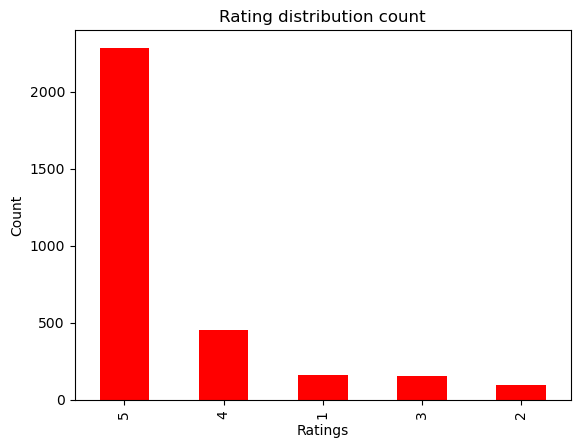

In [33]:
data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [35]:
print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")


Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


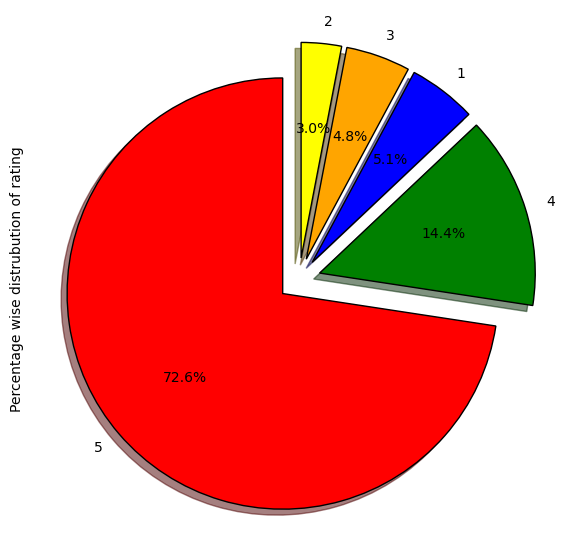

In [37]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
    
graph = BytesIO()
    
fig.savefig(graph, format="png")


### Analyzing 'feedback' column
#### This column refers to the feedback of the verified review

In [40]:
#Distinct values of 'feedback' and its count
print(f"Feedback value count: \n{data['feedback'].value_counts()}")


Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [42]:
#Extracting the 'verified_reviews' value for one record with feedback=0
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)


Sound is terrible if u want good music too get a bose


In [44]:
review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)


Loved it!


In [46]:
#finding the percentage distribution of each feedback
print(f"Feedback value count-percentage distribution : \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count-percentage distribution : 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


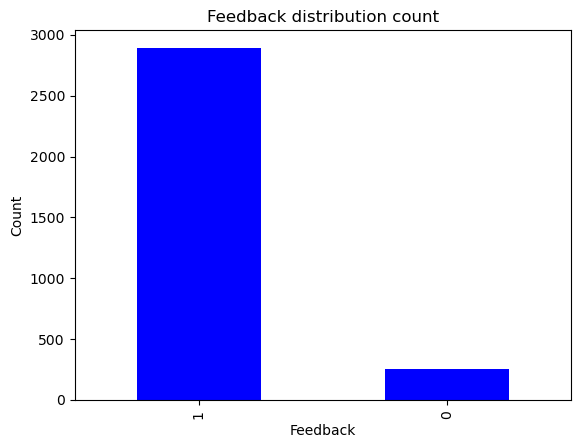

In [48]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()


<Axes: ylabel='Percentage wise distrubution of feedback'>

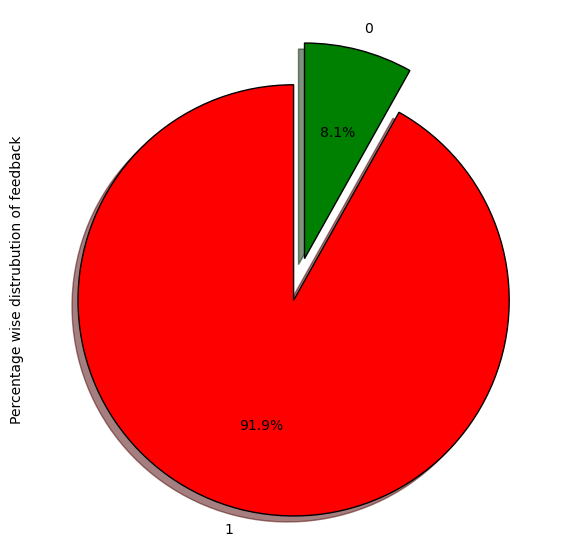

In [50]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['feedback'].value_counts()
data.shape[0]
explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')


In [52]:
data[data['feedback'] == 0]['rating'].value_counts()


rating
1    161
2     95
Name: count, dtype: int64

In [54]:
data[data['feedback'] == 1]['rating'].value_counts()


rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [56]:
print(f"Variation value count:\n{data['variation'].value_counts()}")


Variation value count:
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


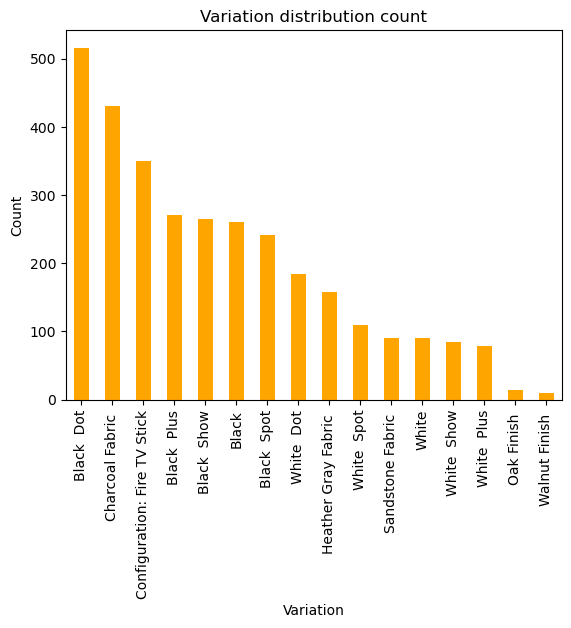

In [58]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()


In [60]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count-percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count-percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [62]:
data.groupby('variation')['rating'].mean()


variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

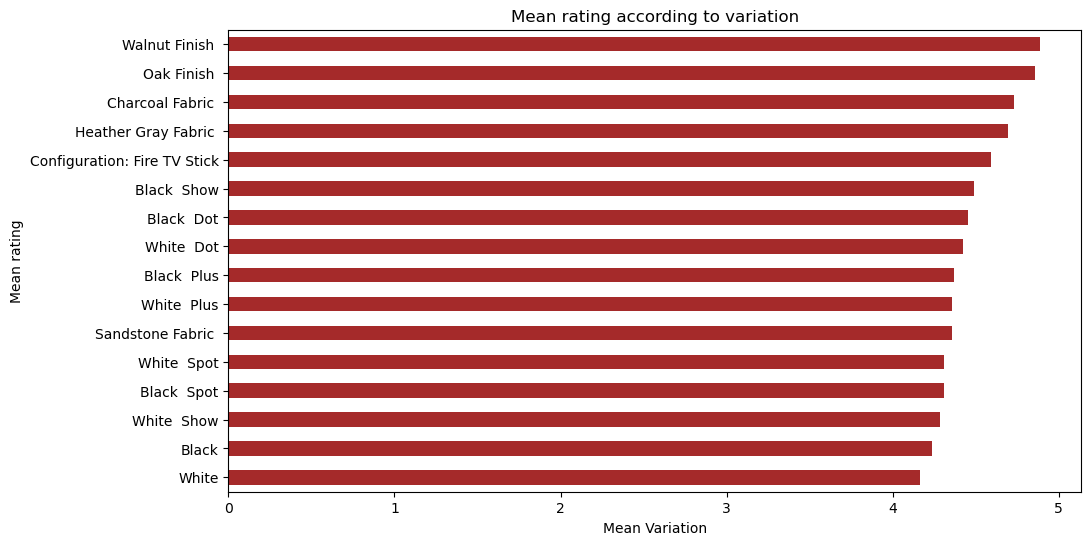

In [64]:
#plotting the mean ratings vs the variation and sorting it in descending order
data.groupby('variation')['rating'].mean().sort_values().plot.barh(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Mean Variation')
plt.ylabel('Mean rating')
plt.show()


In [66]:
data['length'].describe()


count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

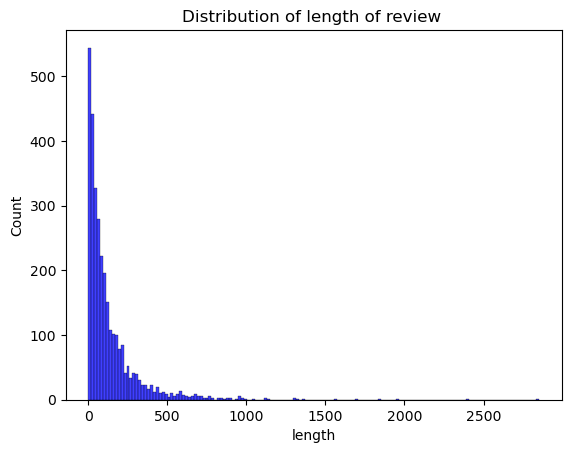

In [68]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

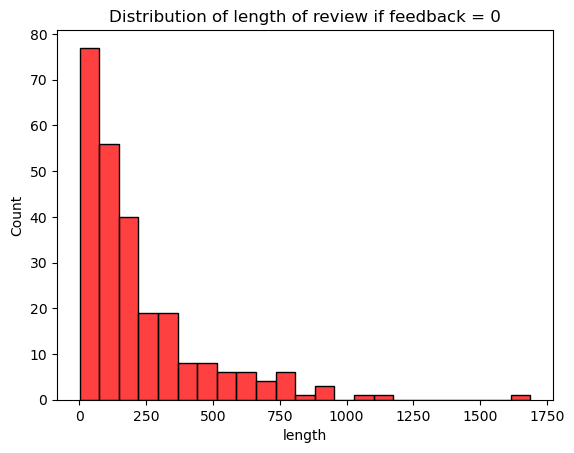

In [70]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

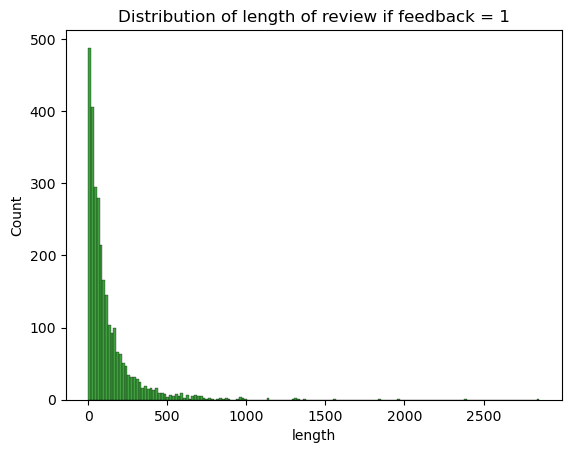

In [72]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')


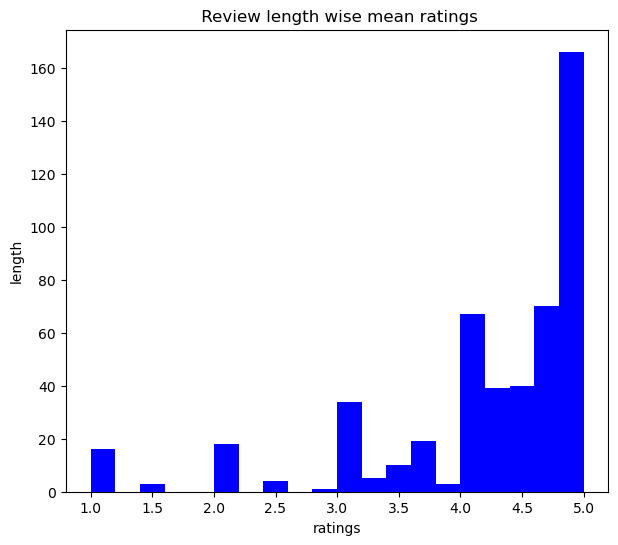

In [74]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()


In [76]:
#we are taking the english stopwords and storing them in cv variable and then fitting it into our dataset
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)


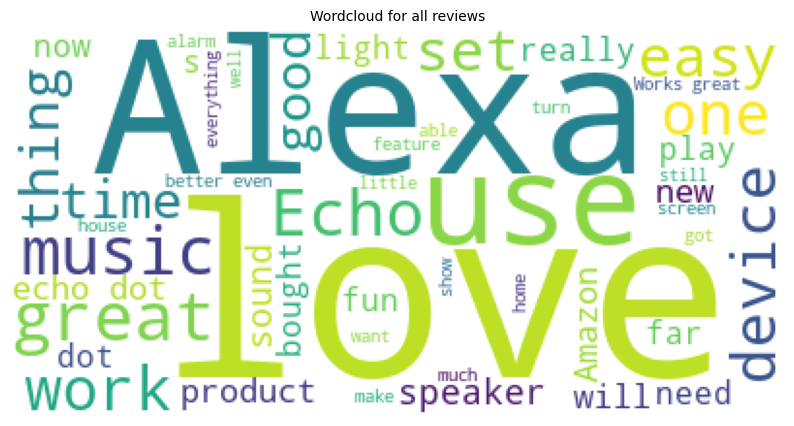

In [78]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()


In [80]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


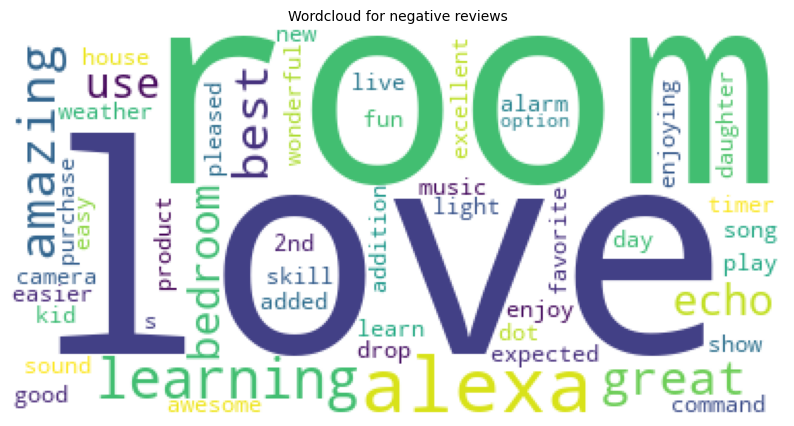

In [82]:
wc = WordCloud(background_color='white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()


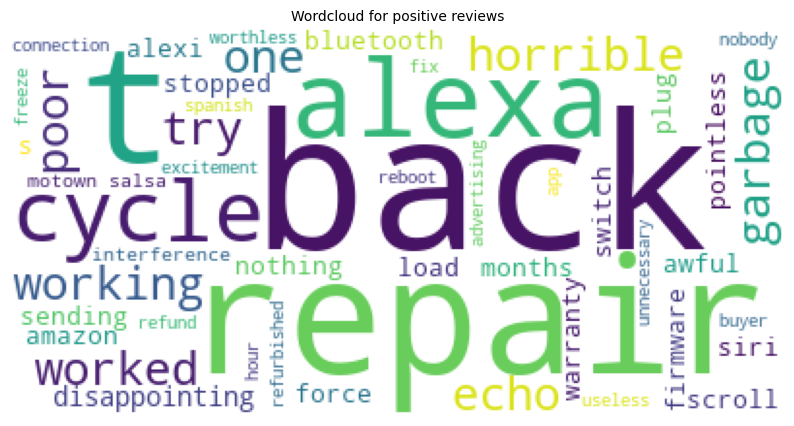

In [83]:
wc = WordCloud(background_color='white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()


### Preprocessing and Modelling



### To build the corpus from the 'verified_reviews' we perform the following - 
1. Replace any non alphabet characters with a space
2. Convert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus


In [88]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [90]:
#vectorization process: where each of the sentences in corpus(paragraphs) are converted into 0's and 1's
#prebuilt in sklearn library.
#we arebusing bag of words to do the vectorization
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [92]:
#Saving the Count Vectorizer
pickle.dump(cv, open('ModelscountVectorizer.pkl', 'wb'))


In [94]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (3149, 2500)
y shape: (3149,)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [98]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")
print(X_train[:5])

X train max value: 12
X test max value: 10
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [100]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)


In [102]:
#Saving the scaler model
pickle.dump(scaler, open('Models_scaler.pkl', 'wb'))


#### Random Forest


In [105]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [107]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))


Training Accuracy : 0.9446460980036298
Testing Accuracy : 0.9259259259259259


In [108]:
#Predicting on the test set
y_preds_rf = model_rf.predict(X_test)


In [111]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds_rf)


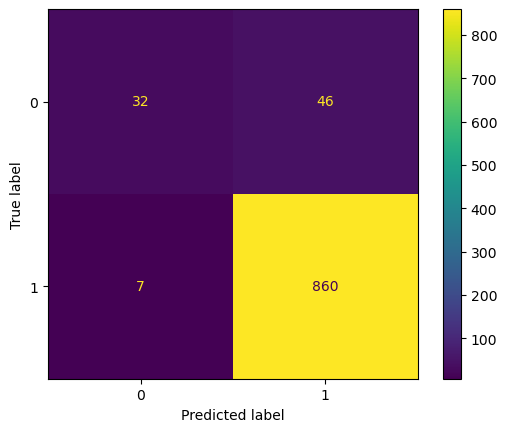

In [113]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()


Training Accuracy Random Forest: 0.9945553539019963
Accuacy for Random Forest: 0.9439153439153439


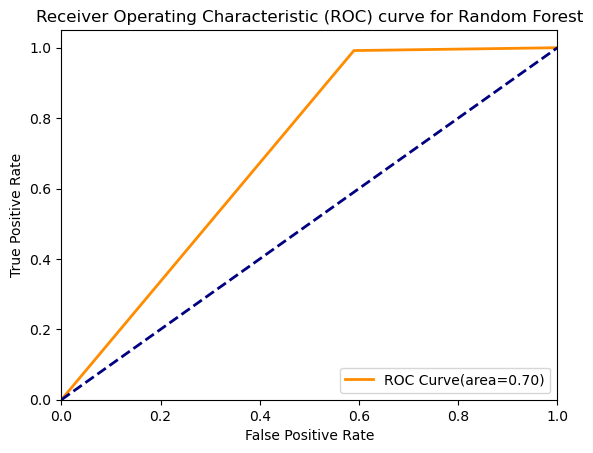

In [115]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

#caculating accuracy
print("Training Accuracy Random Forest:", model_rf.score(X_train, y_train))
accuracy_rf = accuracy_score(y_test, y_preds_rf)
train_accuracy_rf=model_rf.score(X_train, y_train)

#calculate ROC curve and AUC
fpr , tpr , thresholds=roc_curve(y_test, y_preds_rf)
roc_auc=auc(fpr,tpr)

print("Accuacy for Random Forest:",accuracy_rf)
#plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [116]:
##K fold cross-validation
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)
print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())


Accuracy : 0.9305758946935416
Standard Variance : 0.007097247371011979


In [118]:
GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       estimator=RandomForestClassifier(),
       param_grid={'bootstrap': [True], 'max_depth': [80, 100],
       'min_samples_split': [8, 12],
       'n_estimators': [100, 300]},
       return_train_score=True)


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [119]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params={
    'n_estimators':[50, 100, 200],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2,5,10]
}
model_rf = RandomForestClassifier(random_state=42)
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train, y_train.ravel())


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [123]:
#Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(grid_search.best_params_))


Best Parameter Combination : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [125]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds_rf))


Cross validation mean accuracy on train set : 95.1065402971029
Cross validation mean accuracy on test set : 92.08341735564964
Accuracy score for test set : 0.9439153439153439


#### XgBoost


In [128]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))


Training Accuracy : 0.9215063520871143
Testing Accuracy : 0.9164021164021164


In [132]:
y_preds_xgb = model_xgb.predict(X_test)


In [134]:
cm = confusion_matrix(y_test, y_preds_xgb)
print(cm)


[[ 30  48]
 [  7 860]]


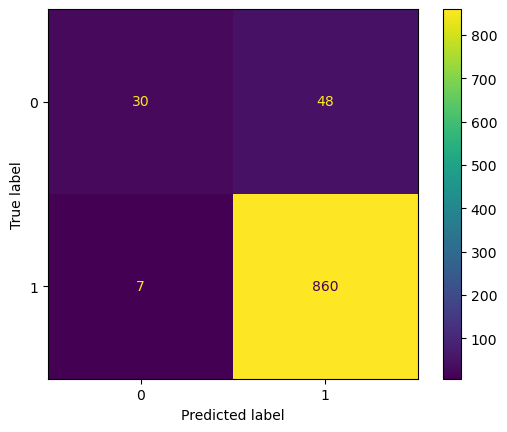

In [136]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()


Training Accuracy XGBoost: 0.971415607985481
Accuacy for XGBoost: 0.9417989417989417


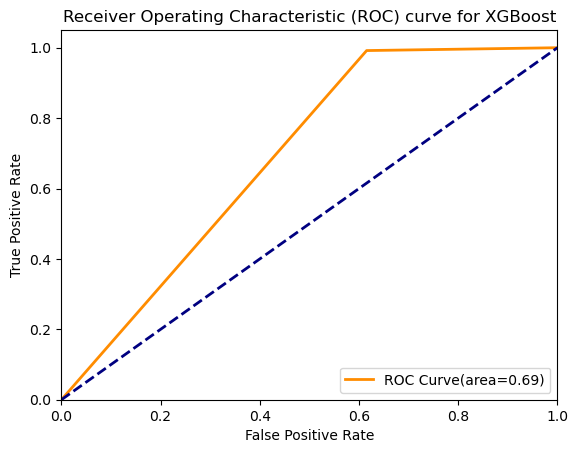

In [138]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

#calculating accuracy
print("Training Accuracy XGBoost:", model_xgb.score(X_train, y_train))
accuracy_xgb = accuracy_score(y_test, y_preds_xgb)
train_accuracy_xgb=model_xgb.score(X_train, y_train)

#calculate ROC curve and AUC
fpr , tpr , thresholds=roc_curve(y_test, y_preds_xgb)
roc_auc=auc(fpr,tpr)

print("Accuacy for XGBoost:",accuracy_xgb)
#plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

In [140]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models_model_xgb.pkl', 'wb'))


#### Decision Tree Classifier


In [158]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [160]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model_dt.score(X_train, y_train))
print("Testing Accuracy :", model_dt.score(X_test, y_test))


Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9185185185185185


In [162]:
y_preds_dt = model_dt.predict(X_test)


In [164]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds_dt)
print(cm)


[[ 41  37]
 [ 40 827]]


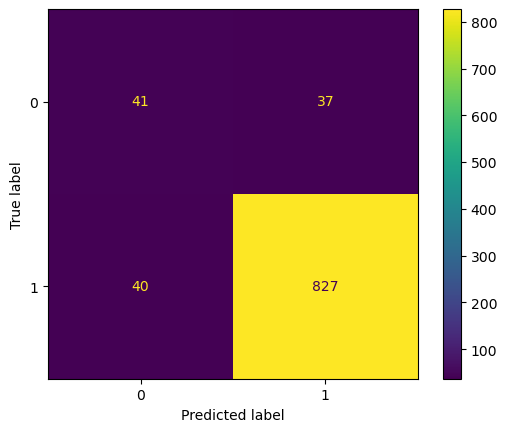

In [166]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()


Training Accuracy _dt: 0.9945553539019963
Accuacy for decision tree: 0.9185185185185185


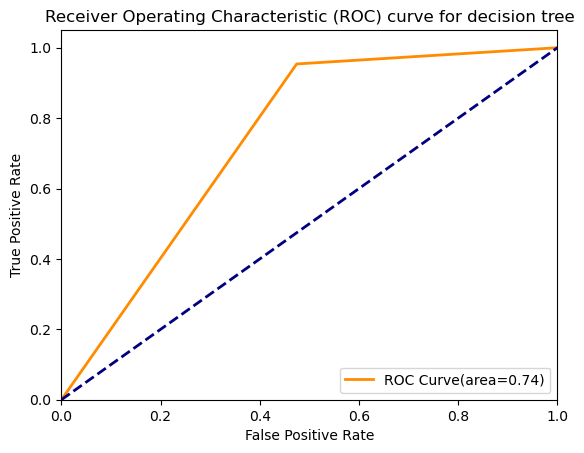

In [171]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

#caculating accuracy
print("Training Accuracy _dt:", model_dt.score(X_train, y_train))
accuracy_dt = accuracy_score(y_test, y_preds_dt)
train_accuracy_dt=model_dt.score(X_train, y_train)

#calculate ROC curve and AUC
fpr , tpr , thresholds=roc_curve(y_test, y_preds_dt)
roc_auc=auc(fpr,tpr)

print("Accuacy for decision tree:",accuracy_dt)
#plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for decision tree')
plt.legend(loc="lower right")
plt.show()

### Performance comparision for all the models

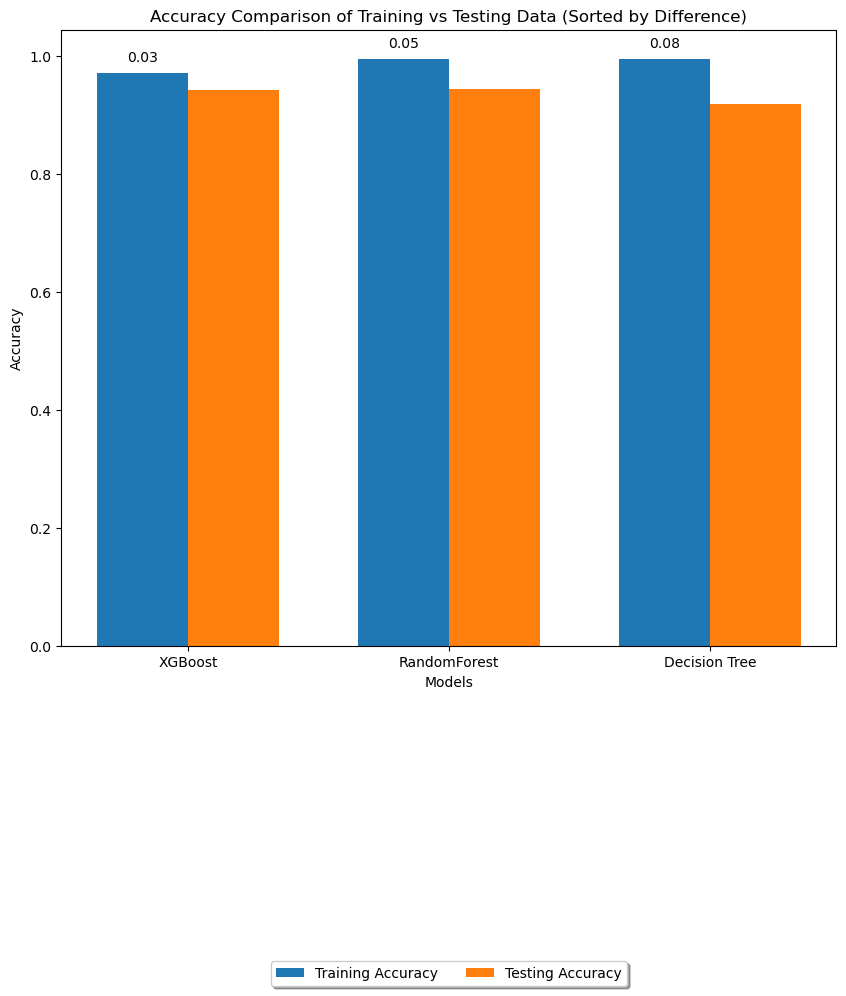

In [174]:
import matplotlib.pyplot as plt 
import numpy as np

#define models and their respective accuracy scores 
models=['RandomForest', 'XGBoost', 'Decision Tree']
train_accuracy=[train_accuracy_rf, train_accuracy_xgb, train_accuracy_dt]
test_accuracy=[accuracy_rf, accuracy_xgb, accuracy_dt]

#calculate absolute difference between training and testing accuracies
#print(type(diff_accuracies), diff_accuracies)
#diff_accuracies= np.abs(np.array(train_accuracy) - np.array(test_accuracy))
diff_accuracies=[abs(train-test) for train, test in zip(train_accuracy, test_accuracy)]
#print(type(diff_accuracies), diff_accuracies)

#sort models based on absolute differences
sorted_indices= np.argsort(diff_accuracies)
sorted_models=[models[i] for i in sorted_indices]
sorted_train_accuracy=[train_accuracy[i] for i in sorted_indices]
sorted_test_accuracy=[test_accuracy[i] for i in sorted_indices]

#define the x-axis positions foe the bars
x=np.arange(len(models))

#define bar width
width=0.35

#set the size of the figure
plt.figure(figsize=(10,8))

#plot bars for training accuracy
train_bars=plt.bar(x-width/2, sorted_train_accuracy, width, label='Training Accuracy')

#plot bars for testing accuracy
test_bars=plt.bar(x+width/2, sorted_test_accuracy, width, label='Testing Accuracy')

#Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Training vs Testing Data (Sorted by Difference)')
plt.xticks(x, sorted_models)

#Add annotations for the difference in accuracies
for train_bar, test_bar in zip(train_bars, test_bars):
    height=max(train_bar.get_height(), test_bar.get_height())
    diff=abs(train_bar.get_height()-test_bar.get_height())
    plt.text(train_bar.get_x()+train_bar.get_width()/2, height+0.02, f'{diff:.2f}', ha='center')

#plot legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=2)

#show plot
plt.show()

In [176]:
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, model_rf.predict(X_test))

Training Accuracy Decision Tree: 0.9945553539019963
Training Accuracy XGBoost: 0.971415607985481
Training Accuracy Random Forest: 0.9945553539019963


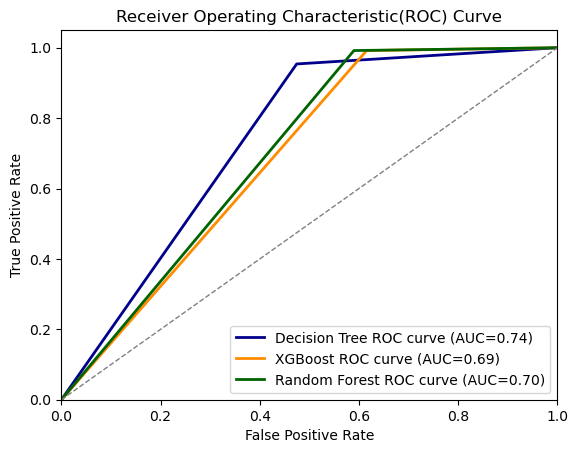

In [178]:
from sklearn.metrics import roc_curve,auc,accuracy_score
import matplotlib.pyplot as plt

#calculate accuracy  for decision tree
print("Training Accuracy Decision Tree:",model_dt.score(X_train, y_train))
accuracy_dt=accuracy_score(y_test, y_preds_dt)
train_accuracy_dt=model_dt.score(X_train, y_train)

#calculate ROC curve and AUC
fpr_dt,tpr_dt,thresholds_dt=roc_curve(y_test, y_preds_dt)
roc_auc_dt=auc(fpr_dt,tpr_dt)

#calculate accuracy  for XGBoost
print("Training Accuracy XGBoost:",model_xgb.score(X_train, y_train))
accuracy_xgb=accuracy_score(y_test, y_preds_xgb)
train_accuracy_xgb=model_xgb.score(X_train, y_train)

#calculate ROC curve and AUC
fpr_xgb,tpr_xgb,thresholds_xgb=roc_curve(y_test, y_preds_xgb)
roc_auc_xgb=auc(fpr_xgb,tpr_xgb)

#calculate accuracy  for random forest
print("Training Accuracy Random Forest:",model_rf.score(X_train, y_train))
accuracy_rf=accuracy_score(y_test, y_preds_rf)
train_accuracy_rf=model_rf.score(X_train, y_train)

#calculate ROC curve and AUC
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test, y_preds_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)

#print("Accuracy for XGBoost:",accuracy_xgb)
#plot ROC curve
plt.figure()
#plot ROC for Decision Tree 
plt.plot(fpr_dt,tpr_dt, color='darkblue',lw=2,label='Decision Tree ROC curve (AUC=%0.2f)' %roc_auc_dt)
#plot ROC for XGBoost
plt.plot(fpr_xgb,tpr_xgb, color='darkorange',lw=2,label='XGBoost ROC curve (AUC=%0.2f)' %roc_auc_xgb)
#plot ROC for Random Forest
plt.plot(fpr_rf,tpr_rf, color='darkgreen',lw=2,label='Random Forest ROC curve (AUC=%0.2f)' %roc_auc_rf)
#plot diagonal line (random classifier)
plt.plot([0,1],[0,1], color='gray',lw=1,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()